In [197]:
import random

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio
from pydub import AudioSegment
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import openpyxl
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow

In [198]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [199]:
# Path for Ravdess dataset
ravdess = "E:\EM/unsplittedDatasets\datasets\RavdevsLow"

In [200]:
ravdess_directory_list = os.listdir(ravdess)
file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    actor = os.listdir(ravdess + "/" + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        if int(part[2])== 8:
            file_emotion.append("happy")
            file_path.append(ravdess+"/"+dir+"/"+file)
        elif int(part[2])==7: continue
        # if int(part[2])==2: continue
        elif int(part[2])==6:
            file_emotion.append("sad")
            file_path.append(ravdess+"/"+dir+"/"+file)
        else:
            file_emotion.append(int(part[2]))
            file_path.append(ravdess + "/" + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
                             5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
Ravdess_df.head()
print(Ravdess_df.shape)


(1248, 2)


In [201]:
emotionCount = {}
for i in Ravdess_df.index:
    emotions = Ravdess_df["Emotions"][i]
    if emotions in emotionCount:
        emotionCount[emotions] += 1
    else:
        emotionCount[emotions] = 1
emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
print(emotionCount)

{'angry': 192, 'happy': 384, 'neutral': 288, 'sad': 384}


In [202]:
emotionCount = {'angry': 192, 'happy': 310, 'neutral': 270, 'sad': 315}

for i in Ravdess_df.index:
    emotions = Ravdess_df["Emotions"][i]
    if emotions in emotionCount:
        if emotionCount[emotions] > 0:
            emotionCount[emotions] -= 1
        else:
            Ravdess_df.drop(i, inplace=True)

print(Ravdess_df.shape)


(1087, 2)


In [203]:
# emotionCount = {}
# for i in Ravdess_df.index:
#     emotions = Ravdess_df["Emotions"][i]
#     if emotions in emotionCount:
#         emotionCount[emotions] += 1
#     else:
#         emotionCount[emotions] = 1
# emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
# print(emotionCount)

In [204]:
# # smallCount = min(emotionCount.values())
# smallCount = 288
# print(smallCount)

In [205]:
# counts = Ravdess_df['Emotions'].value_counts()
#
# # find the minimum count
# min_count = 300
#
# # create a list to store the balanced dataframes
# balanced_dfs = []
#
# # iterate over the emotions
# for emotion in counts.index:
#     # subset the data for the current emotion to have the minimum count
#     balanced_df = Ravdess_df[Ravdess_df['Emotions'] == emotion].head(min_count)
#     balanced_dfs.append(balanced_df)
#
# # concatenate all the balanced dataframes into one final dataframe
# final_df = pd.concat(balanced_dfs)
# Ravdess_df = final_df
# Ravdess_df


In [206]:
emotionCount = {}
for i in Ravdess_df.index:
    emotions = Ravdess_df["Emotions"][i]
    if emotions in emotionCount:
        emotionCount[emotions] += 1
    else:
        emotionCount[emotions] = 1
emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
print(emotionCount)

{'angry': 192, 'happy': 310, 'neutral': 270, 'sad': 315}


In [207]:
# data_path = pd.concat([Ravdess_df], axis=0)
# data_path.to_csv("data_path_R.csv", index=False)
# data_path.head()

,Emotions,Path
0,neutral,E:\EM/unsplittedDatasets\datasets\RavdevsLow/A...
1,neutral,E:\EM/unsplittedDatasets\datasets\RavdevsLow/A...
2,neutral,E:\EM/unsplittedDatasets\datasets\RavdevsLow/A...
3,neutral,E:\EM/unsplittedDatasets\datasets\RavdevsLow/A...
4,neutral,E:\EM/unsplittedDatasets\datasets\RavdevsLow/A...


In [208]:
emotionList = pd.read_csv("data_path_R_great.csv")
emotions = emotionList["Emotions"]
emotionCount = {}
for item in emotions:
    if item in emotionCount:
        emotionCount[item] += 1
    else:
        emotionCount[item] = 1
emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
print(emotionCount)

{'angry': 192, 'happy': 310, 'neutral': 270, 'sad': 315}


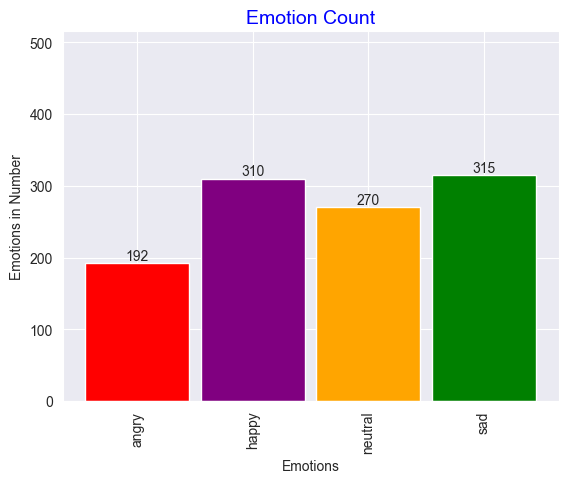

In [209]:
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")

# emotionCount.values()

# for index, value in enumerate(emotionCount)
# for index,value in enumerate(emotionCount.values()):
#     plt.text(value,index,value)
# plt.show()


In [210]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


In [211]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def volumeAdd(data):
    songData = AudioSegment.from_wav(data)
    print("sing", songData)
    songDataSamples = np.array(songData.get_array_of_samples())
    songHighVolumed = songDataSamples - 10000.0
    print(songHighVolumed)
    return songHighVolumed


E:\EM/unsplittedDatasets\datasets\RavdevsLow/Actor_01/03-01-01-01-01-02-01.wav


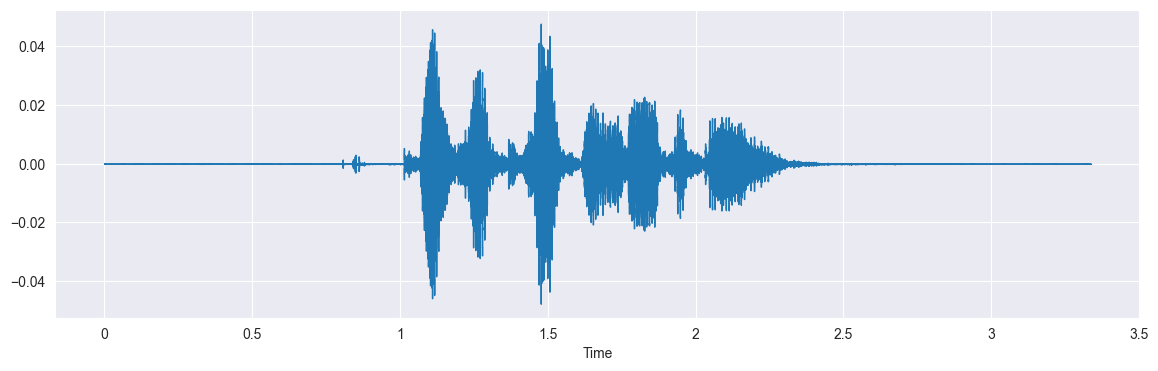

In [212]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
print(path)
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)


In [213]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


Uncomment for extracting features, from here

In [214]:
# X, Y = [], []
# for path, emotion in zip(data_path.Path, data_path.Emotions):
#     try:
#         feature = get_features(path)
#     except:
#         print(path)
#         print(emotion)
#     for ele in feature:
#         try:
#             X.append(ele)
#             # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
#             Y.append(emotion)
#         except:
#             print(ele)
#
#
# Features = pd.DataFrame(X)
# Features['labels'] = Y
# Features.to_excel('features_R.xlsx', index=False)
#
# X = Features.iloc[:, :-1].values
# Y = Features['labels'].values

In [215]:
# len(X), len(Y), data_path.Path.shape

to here

In [216]:
features_df = pd.read_excel("features_R_great.xlsx")

In [217]:
emotionsfromFeatures = features_df['labels']
emotionCountfromFeatures = {}
for item in emotionsfromFeatures:
    if item in emotionCountfromFeatures:
        emotionCountfromFeatures[item] += 1
    else:
        emotionCountfromFeatures[item] = 1
print(emotionCountfromFeatures)

{'neutral': 810, 'happy': 930, 'sad': 945, 'angry': 576}


In [218]:
featuresofit = np.asarray(features_df.iloc[:, :-1].values)
X = featuresofit
labelofit = np.asarray(features_df['labels'])
Y = labelofit

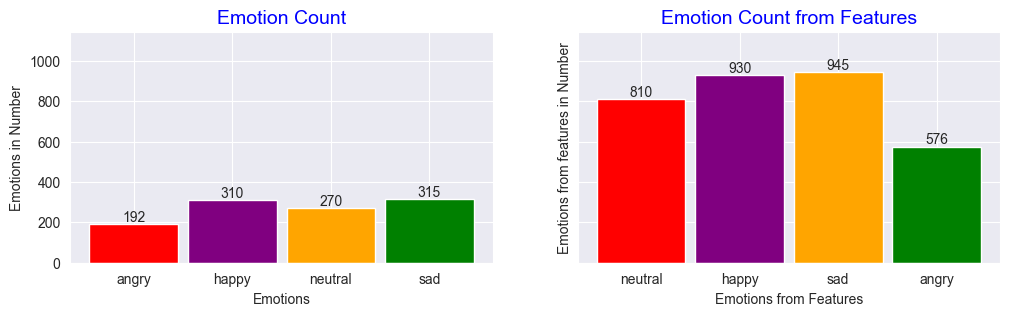

In [219]:
fig, (plt1, plt2) = plt.subplots(1, 2, sharey=True, figsize=(12, 3))
plt1.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt1.set_xlabel("Emotions")
plt1.set_ylabel("Emotions in Number")
plt1.set_title("Emotion Count", size=14, color="Blue")
plt1.set_ylim([0, max(emotionCount.values()) + 200])
# lst = []
for item in emotionCount:
    plt1.text(item, emotionCount[item],
              emotionCount[item], ha="center", va="bottom")

plt2.bar(emotionCountfromFeatures.keys(), emotionCountfromFeatures.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt2.set_xlabel("Emotions from Features")
plt2.set_ylabel("Emotions from features in Number")
plt2.set_title("Emotion Count from Features", size=14, color="Blue")
plt2.set_ylim([0, max(emotionCountfromFeatures.values()) + 200])
# lst = []
for item in emotionCountfromFeatures:
    plt2.text(item, emotionCountfromFeatures[item],
              emotionCountfromFeatures[item], ha="center", va="bottom")
# plt2.subplots(nrows=1,ncols=2)

In [227]:
# print(Y)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, random_state=0, test_size=0.1, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# pd.DataFrame(Y)

((2934, 162), (2934,), (327, 162), (327,))

In [228]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_train

array([[-0.93162453,  0.37628799,  1.39024754, ..., -0.17399775,
        -0.17412629, -0.17316452],
       [ 0.10722234, -0.77292587, -0.40399143, ..., -0.17120821,
        -0.17137474, -0.17041271],
       [ 0.83791304,  0.20138182,  0.43480796, ..., -0.17399783,
        -0.17412638, -0.1731646 ],
       ...,
       [-0.84481105, -0.8413894 , -0.30738391, ..., -0.17399783,
        -0.17412638, -0.1731646 ],
       [-1.68867611,  0.19065394,  0.51491453, ..., -0.17399783,
        -0.17412638, -0.1731646 ],
       [-0.85299813, -3.26971063, -3.33479222, ..., -0.17399692,
        -0.1741255 , -0.17316377]])

In [229]:
C_choice = [.1,1,10,100,200]
import random

In [234]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

for i in C_choice:
    classifier = svm.SVC(kernel='poly', gamma="auto", C=i)
    classifier = OneVsRestClassifier(classifier)
    classifier.fit(x_train, y_train)
    y_predict = classifier.predict(x_test)
    accuracyPercent = accuracy_score(y_test, y_predict) * 100
    print("Kernel:  " + "rbf" + "  ||  " + " C: " + str(i) + "  ||  Accuracy" + "  :  " + str(accuracyPercent))

Kernel:  rbf  ||   C: 0.1  ||  Accuracy  :  69.72477064220183
Kernel:  rbf  ||   C: 1  ||  Accuracy  :  70.9480122324159
Kernel:  rbf  ||   C: 10  ||  Accuracy  :  72.17125382262996
Kernel:  rbf  ||   C: 100  ||  Accuracy  :  73.70030581039755
Kernel:  rbf  ||   C: 200  ||  Accuracy  :  73.08868501529052


In [235]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       angry       0.83      0.82      0.83        61
       happy       0.67      0.72      0.69        81
     neutral       0.69      0.85      0.77        82
         sad       0.76      0.59      0.67       103

    accuracy                           0.73       327
   macro avg       0.74      0.75      0.74       327
weighted avg       0.74      0.73      0.73       327



In [236]:
yPred = classifier.predict(x_train)
print(accuracy_score(y_train,yPred)*100)

75.86912065439672


Confusion matrix, without normalization


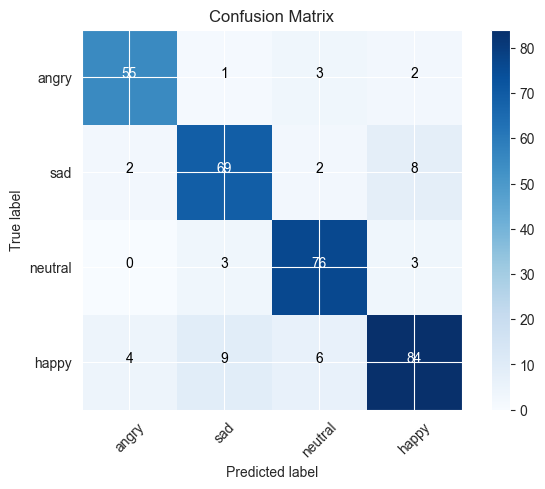

In [233]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion = confusion_matrix(y_test, y_predict)
# df_confusion = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

plot_confusion_matrix(confusion, classes=["angry", "sad", "neutral", "happy"],
                      title='Confusion Matrix')
plt.show()